# Cell vertex model visualiation

It would be nice to have a step by step visualization to guide how our versions of cell soap bubble models are created. Here is a shot at outlining the usage of our data structures

In [64]:
from DLITE.cell_describe import node, edge, cell, colony
import matplotlib
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

Each cell is surrounded by $n$ nodes, each node is connected to $m$ other nodes via edges. Each edge has two nodes, a maximum of two cells, and a radius of curvature. The edges have a clockwise orientation

To demonstrate how this works, let's try and recreate the following diagram that is hand drawn.

![title](img/cell_vertex_graph.png)

As above, the nodes are represented as $n_i$ and the edges as $m_{ij}$ with the right-hand-positive directionality of the radii of curvature. Cells are $c_k$.

In [55]:
# Node xy locations taken from image,  
# radii are pretty random guesses

nodes = [node((741, 681)), #n_1
         node((1443, 495)), #n_2
         node((1797, 537)), #n_3
         node((408, 1098)), #n_4
         node(( 1011,  1170)), #n_5
         node(( 1467, 1209)), #n_6
         node(( 777, 1539)), #n_7
         node(( 1470, 1623)), #n_8
         node(( 1548, 1404)), #n_9
         node(( 1851, 1377)), #n_10
         node(( 2214, 864)), #n_11
         node(( 2256, 243)), #n_12
         node(( 1434, 42)), #n_13
         node(( 468, 357)), #n_14
         node(( 39, 1089)), #n_15
         node(( 117, 1530)), #n_16
         node(( 870, 2106)), #n_17
         node(( 1965, 1965)), #n_18
         node(( 1929, 1740)),] #n_19

edges = [edge(nodes[0], nodes[3],  600), #m_1,4
         edge(nodes[4], nodes[0], 1000), #m_5,1
         edge(nodes[6], nodes[4],  600), #m_7,5
         edge(nodes[6], nodes[3],  1000), #m_7,4
         edge(nodes[1], nodes[0],  900), #m_2,1
         edge(nodes[1], nodes[5], 2000), #m_2,6
         edge(nodes[5], nodes[4],  1000), #m_6,5
         edge(nodes[2], nodes[1], 1000), #m_3,2
         edge(nodes[9], nodes[2], 2000), #m_10,3
         edge(nodes[8], nodes[9], 1000), #m_9,10
         edge(nodes[5], nodes[8], 1000), #m_6,9
         edge(nodes[7], nodes[8], 1000), #m_8,9
         edge(nodes[6], nodes[7], 1000), #m_7,8
         edge(nodes[6], nodes[15], 1000), #m_7,16
         edge(nodes[3], nodes[14], 1000), #m_4,15
         edge(nodes[13], nodes[0], 1000), #m_14,1
         edge(nodes[1], nodes[12], 1000), #m_2,13
         edge(nodes[11], nodes[2], 1000), #m_12,3
         edge(nodes[9], nodes[10], 600), #m_10,11
         edge(nodes[9], nodes[18], 1000), #m_10,19
         edge(nodes[7], nodes[17], 600), #m_8,18
         edge(nodes[16], nodes[6], 1000)] #m_17,7

## Create list of cell nodes and edges

cell_a_nodes = [nodes[0], #n_1
                nodes[4], #n_5
                nodes[6], #n_7
                nodes[3]] #n_4
cell_a_edges = [edges[0], #m_1,4
                edges[1], #m_5,1
                edges[2], #m_7,5
                edges[3]] #m_7,4

cell_b_nodes = [nodes[0], #n_1
                nodes[1], #n_2
                nodes[5], #n_6
                nodes[4]] #n_5
cell_b_edges = [edges[4], #m_2,1
                edges[5], #m_2,6
                edges[6], #m_6,5
                edges[1]] #m_5,1
                
cell_c_nodes = [nodes[1], #n_2
                nodes[2], #n_3
                nodes[9], #n_10
                nodes[8], #n_9
                nodes[5]] #n_6
cell_c_edges = [edges[7], #m_3,2
                edges[8], #m_10,3
                edges[9], #m_9,10
                edges[10], #m_6,9
                edges[5]] #m_2,6

cell_d_nodes = [nodes[4], #n_5
                nodes[5], #n_6
                nodes[8], #n_9
                nodes[7], #n_8
                nodes[6]] #n_7
cell_d_edges = [edges[6], #m_6,5
                edges[10], #m_6,9
                edges[11], #m_8,9
                edges[12], #m_7,8
                edges[2]] #m_7,5

# Create cells
cells = [cell(cell_a_nodes, cell_a_edges),
         cell(cell_b_nodes, cell_b_edges), 
         cell(cell_c_nodes, cell_c_edges),
         cell(cell_d_nodes, cell_d_edges)]

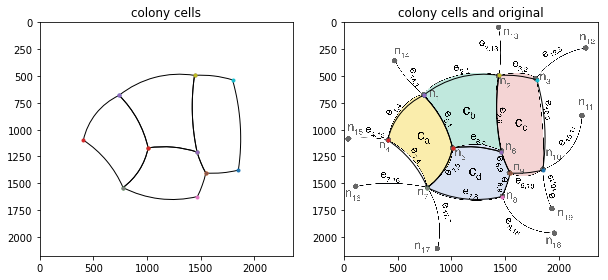

In [57]:
fig, axes = plt.subplots(1,2,figsize=(10,6))

## By itself
[cell.plot(axes[0]) for cell in cells];
# [edge.plot(axes[0]) for edge in edges];
axes[0].set_title("colony cells")

## With original image
img = matplotlib.image.imread('img/cell_vertex_graph.png')
axes[1].imshow(img)
[cell.plot(axes[1]) for cell in cells]
axes[1].set_title("colony cells and original")

[a.set(xlim=(0,img.shape[1]), ylim=(img.shape[0], 0), aspect=1) for a in axes]
plt.show()

Looks like the data structures are working. Now lets define a colony comprising our list of cells, edges and nodes

In [65]:
this_colony = colony(cells, edges, nodes)

We can call the *calculate_tension* method of the colony class to compute tensions for this set of edges

In [66]:
tensions, _, _ = this_colony.calculate_tension(solver='DLITE')

guess tension is [0.84, 0.17, 0.42, 0.88, 0.75, 0.69, 0.17, 0.22, 0.47, 0.95, 1.01, 0.1, 0.75, 0.81, 0.23, 0.55, 0.32, 0.38, 0.11, 0.83, 0.36, 0.86]
Function value 0.08725342690464692
Solution [0.3243669  0.32208077 0.34041782 0.89141874 0.33822143 0.76968556
 0.13730401 0.30039421 0.32454818 0.5671922  0.84402151 0.72307042
 0.57836962 1.04305557 0.83128712 0.25062273 0.70582198 0.2996217
 0.53616913 0.39611331 0.56744504 1.23803849]


-----------------------------


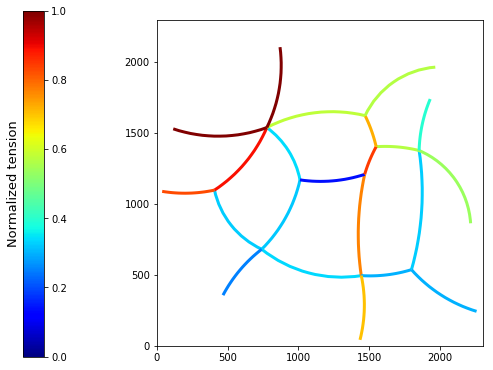

In [67]:
fig, axes = plt.subplots(1,1,figsize=(10,6))

this_colony.plot_tensions(axes, fig, tensions, min_x=0, max_x=2300, min_y=0, max_y=2300, 
                      min_ten = 0, max_ten = 1, specify_color = 'jet',cbar = 'no', lw = 3)
sm = plt.cm.ScalarMappable(cmap=cm.jet, norm=plt.Normalize(vmin=0, vmax=1))
sm._A = []
cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8])
cl = plt.colorbar(sm, cax=cbaxes)
cl.set_label('Normalized tension', fontsize=13, labelpad=-60)

plt.show()

Theres the predicted tension we get! 